# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
#there is no significant difference between the email templates.  
#quantitatively, the new template should not differ from 5% rr (std .0475) 

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
#The new template has a more favorable response rate/std
#quantitatively, the new template should have > 5% rr (std .0475) 

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [25]:
# Calculate the required sample size
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots
power_analysis = TTestIndPower()


alpha=0.05
power=0.8
effect_size=0.01
std=0.0475
#Not sure how to make normalized effect size using Cohen's d since we don't have current population to make pooled variance
#could potentially just use "number of stdevs between the means" idea.  If both pops have same std, can do...
effect_size = effect_size/std

res = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
res

355.1427544342681

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

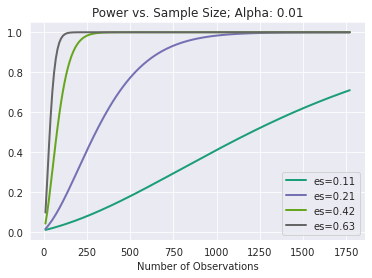

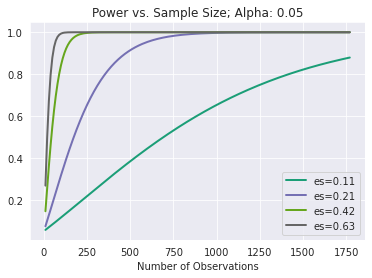

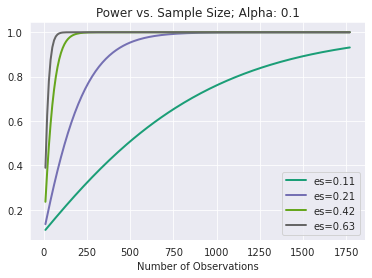

In [26]:
#Your code; plot power curves for the various alpha and effect size combinations
alphas=[0.01, 0.05, 0.1]
power=0.8
effect_sizes=np.array([0.005, .01, .02, .03])/std

# res = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
# res
for i in range(len(alphas)):
    power_analysis.plot_power(dep_var='nobs',
                              nobs = np.array(range(10,int(res*5),10)),
                              effect_size=effect_sizes,
                              alpha=alphas[i]
                             )
    plt.title('Power vs. Sample Size; Alpha: {}'.format(alphas[i]))
    plt.show()



## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

In [31]:
###calculating specific values on the curves.

alpha=0.01
power=0.8
effect_size=0.01
std=0.0475
effect_size = effect_size/std

res = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(res)

####
alpha=0.05
power=0.8
effect_size=0.01
std=0.0475
effect_size = effect_size/std

res = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(res)

528.6745384915633
355.1427544342681


### Your answer here

# Answer
We could reject alpha of .01 because it just requires far more observations to grow the power high enough.  However, it does allow for a very robustly low Type 1 error rate.  Let's consider it. For alpha 0.01, power .8, effect size 0.01, this would require sampling ~528 people.  

Let's reject alpha of 0.1 because it allows for too many Type1 errors.  

For alpha of 0.05, power .8, effect size 0.01, this would require sampling ~355 users.  This would also be a viable approach.  

If we don't want to sample so many users, we could also dial the effect size up to .02.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.